#### Libraries

In [465]:
import numpy as np
import math as m
import matplotlib as mp
import scipy as sp
from scipy.integrate import quad
from matplotlib import pyplot as plt
from scipy.integrate import dblquad

## 2 The Corporate Financial Situation before the Bisiness Cycle

#### The Normal Distribution

In [466]:
def pdf_nrm (x,mu,sd):
    return (1/(sd*m.sqrt(2*m.pi)))*m.exp(-0.5*(((x-mu)/sd)**2))

#### The Values of the Parameters

In [467]:
rm=0.075
mu_r1u=0.03
mu_r2u=0.02
sd_r1u=0.3
sd_r2u=0.2
mu_s1=0.8
mu_s2=0.5
sd_s1=8
sd_s2=5
A1=1
A2=1
a=0.75

In [468]:
mu_r1=mu_r1u+mu_s1*rm
mu_r2=mu_r2u+mu_s2*rm
var_r1=(sd_r1u**2)+(sd_s1**2)*(rm**2)
var_r2=(sd_r2u**2)+(sd_s2**2)*(rm**2)
sd_r1=var_r1**0.5
sd_r2=var_r2**0.5

In [469]:
print(mu_r1)
print(mu_r2)
print(sd_r1)
print(sd_r2)

0.09
0.057499999999999996
0.6708203932499369
0.425


#### Pdfs of interest rates

In [470]:
def pdf_r1 (r1):
    return pdf_nrm(r1, mu_r1, sd_r1)

In [471]:
def pdf_r2 (r2):
    return pdf_nrm(r2, mu_r2, sd_r2)

#### Pdfs of the real value of the assets

In [472]:
def pdf_A1r(A1r):
    return pdf_r1((A1-A1r)/A1r)*(A1/(A1r**2))

In [473]:
def pdf_A2r(A2r):
    return pdf_r2((A2-A2r)/A2r)*(A2/(A2r**2))

In [474]:
plot_pdf_A1r = []
j=0.1
while j < 2:
    plot_pdf_A1r.append(pdf_A1r(j))
    j+=0.01
#print(plot_pdf_A1r)

In [475]:
x_ax = []
j=0.1
while j < 2:
    x_ax.append(j)
    j+=0.01

In [476]:
plot_pdf_A2r = []
j=0.1
while j < 2:
    plot_pdf_A2r.append(pdf_A2r(j))
    j+=0.01
#print(plot_pdf_A2r)

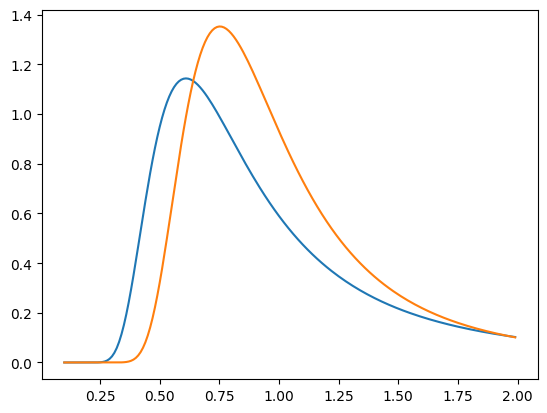

In [477]:
plt.plot(x_ax, plot_pdf_A1r)
plt.plot(x_ax, plot_pdf_A2r)

#### Pdfs of the capital

In [478]:
def pdf_K1 (K1):
    return pdf_A1r(a+K1)

In [479]:
def pdf_K2 (K2):
    return pdf_A2r(a+K2)

In [480]:
plot_pdf_K1 = []
j=-1
while j < 2:
    plot_pdf_K1.append(pdf_K1(j))
    j+=0.01
#print(plot_pdf_A1r)

In [481]:
x_ax_K = []
j=-1
while j < 2:
    x_ax_K.append(j)
    j+=0.01

In [482]:
plot_pdf_K2 = []
j=-1
while j < 2:
    plot_pdf_K2.append(pdf_K2(j))
    j+=0.01
#print(plot_pdf_A2r)

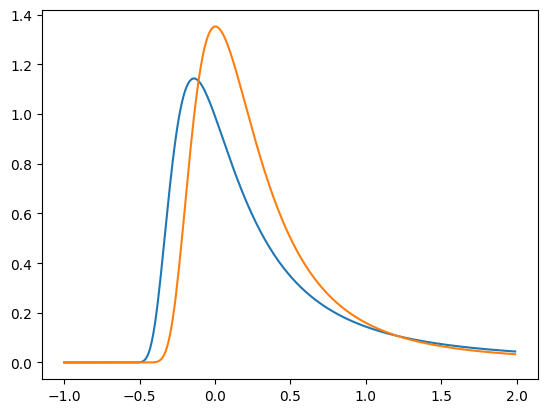

In [483]:
plt.plot(x_ax_K, plot_pdf_K1)
plt.plot(x_ax_K, plot_pdf_K2)

In [484]:
def arg_int(K, K1):
  return pdf_K1(K1)*pdf_K2(K-K1)

In [485]:
def pdf_K(K):
    return quad(arg_int,-0.5,10,args=(K, ))[0]

In [486]:
plot_pdf_K = []
j=-1
while j < 5:
    plot_pdf_K.append(pdf_K(j))
    j+=0.01

In [487]:
x_ax_KK = []
j=-1
while j < 5:
    x_ax_KK.append(j)
    j+=0.01

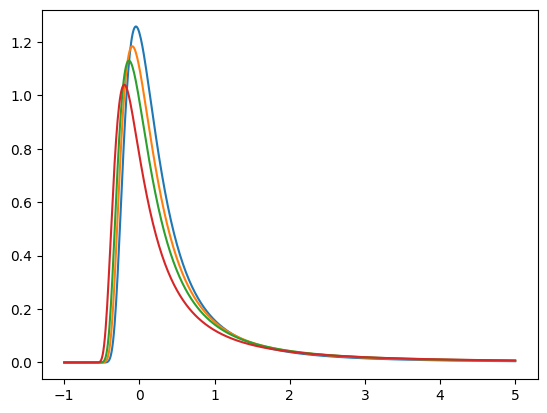

In [488]:
plt.plot(x_ax_KK, plot_pdf_K_0)
plt.plot(x_ax_KK, plot_pdf_K_1)
plt.plot(x_ax_KK, plot_pdf_K_2)
plt.plot(x_ax_KK, plot_pdf_K_3)

In [489]:
print(dblquad(arg_int,-5,10,-1,0))

(0.19077191571733546, 1.3782255814970119e-08)


#### Mean and variance of the kapital

In [490]:
def arg_int_E (K, K1):
  return pdf_K1(K1)*pdf_K2(K-K1)*K

In [491]:
mu_K=dblquad(arg_int,-5,10,-1,5)[0]

In [492]:
print(mu_K)

0.8933903798620952


In [493]:
def arg_int_EE (K, K1):
  return pdf_K1(K1)*pdf_K2(K-K1)*K**2

In [494]:
var_K=dblquad(arg_int,-5,10,-1,5)[0]-mu_K**2

In [495]:
print(var_K)

0.0952440090319564


In [496]:
sd_K=var_K**0.5

In [497]:
print(sd_K)

0.30861628121658846
